In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


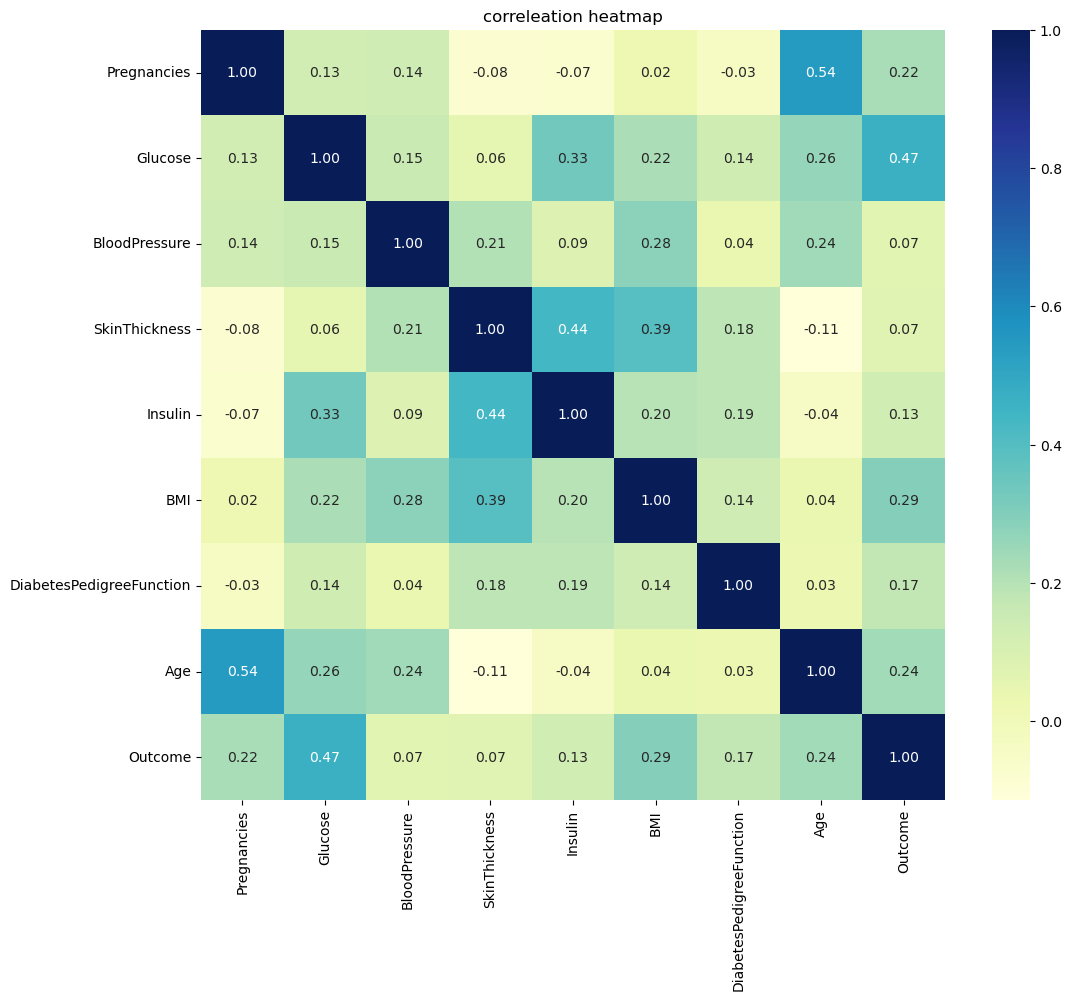

In [6]:
# correleation plot of independent variable
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, fmt = ".2f", cmap = "YlGnBu")
plt.title("correleation heatmap")
plt.show()

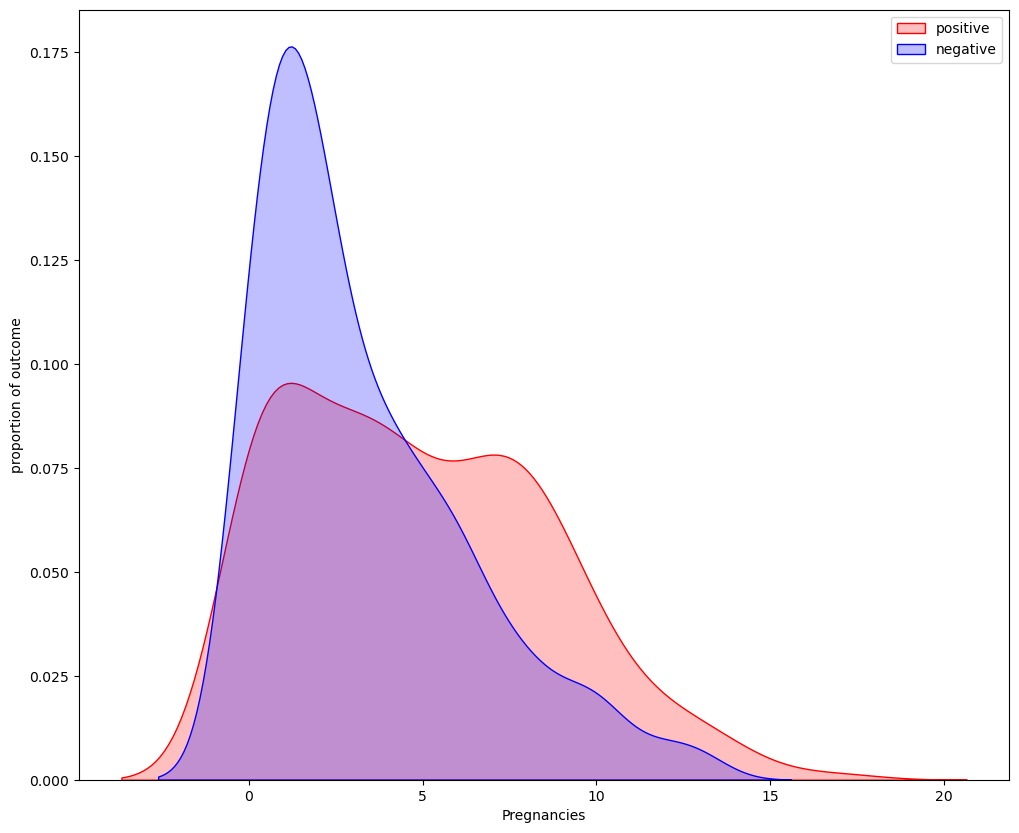

In [9]:
#plotting density graph of prgnancies and target variable
plt.figure(figsize = (12,10))
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==1], color="Red", fill = True)
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==0], color="Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("proportion of outcome")
kde.legend(["positive", "negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

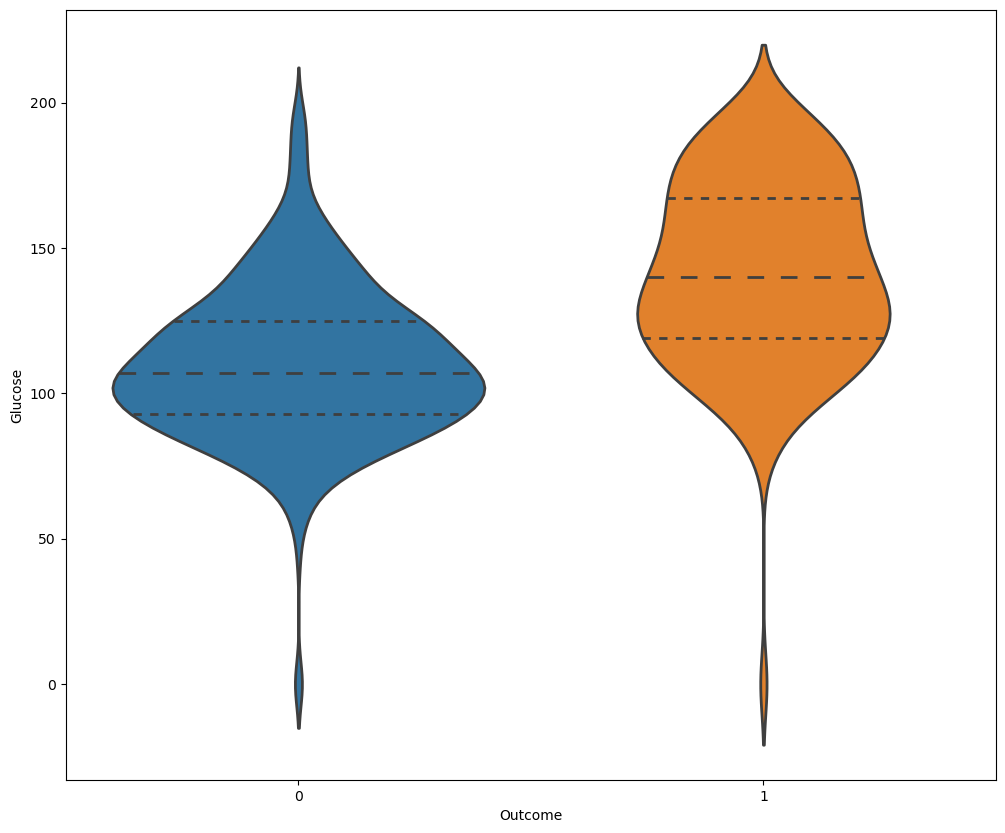

In [10]:
#plotting density graphs
plt.figure(figsize = (12,10))
sns.violinplot(data = data, x = "Outcome", y = "Glucose", split = True, linewidth = 2, inner = "quart")

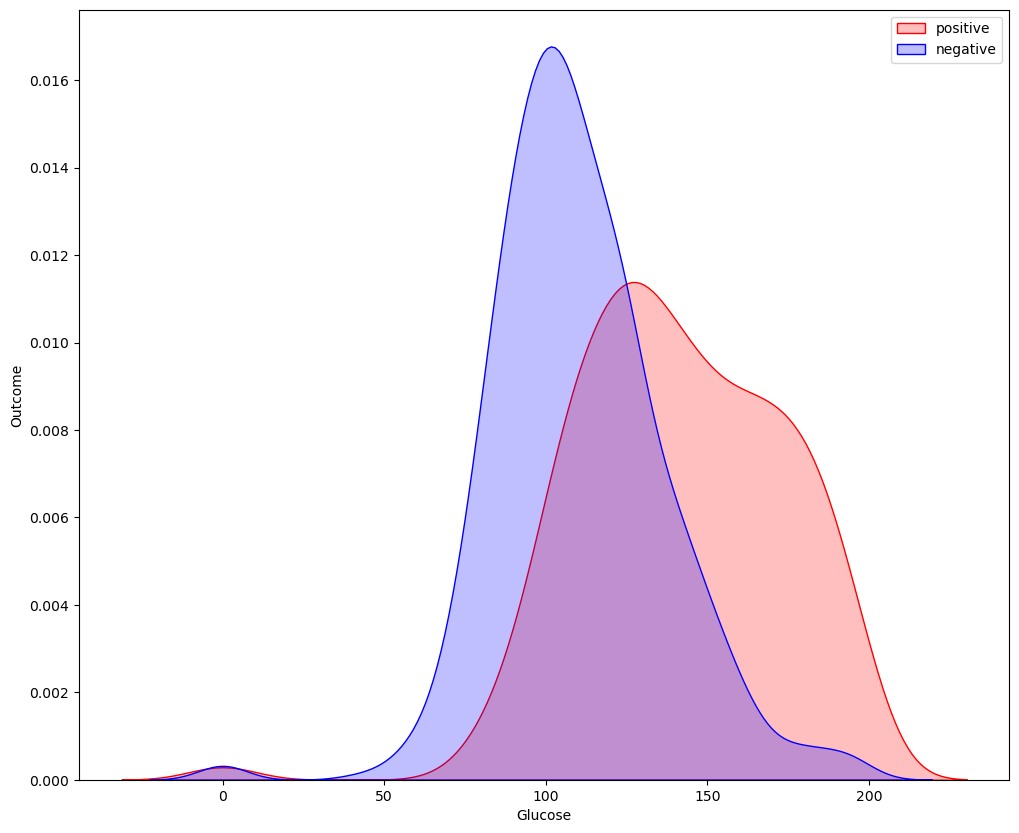

In [12]:
#plotting density graphs
plt.figure(figsize = (12,10))
kde = sns.kdeplot(data["Glucose"][data["Outcome"]==1], color="Red", fill = True)
kde = sns.kdeplot(data["Glucose"][data["Outcome"]==0], color="Blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Outcome")
kde.legend(["positive", "negative"])

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

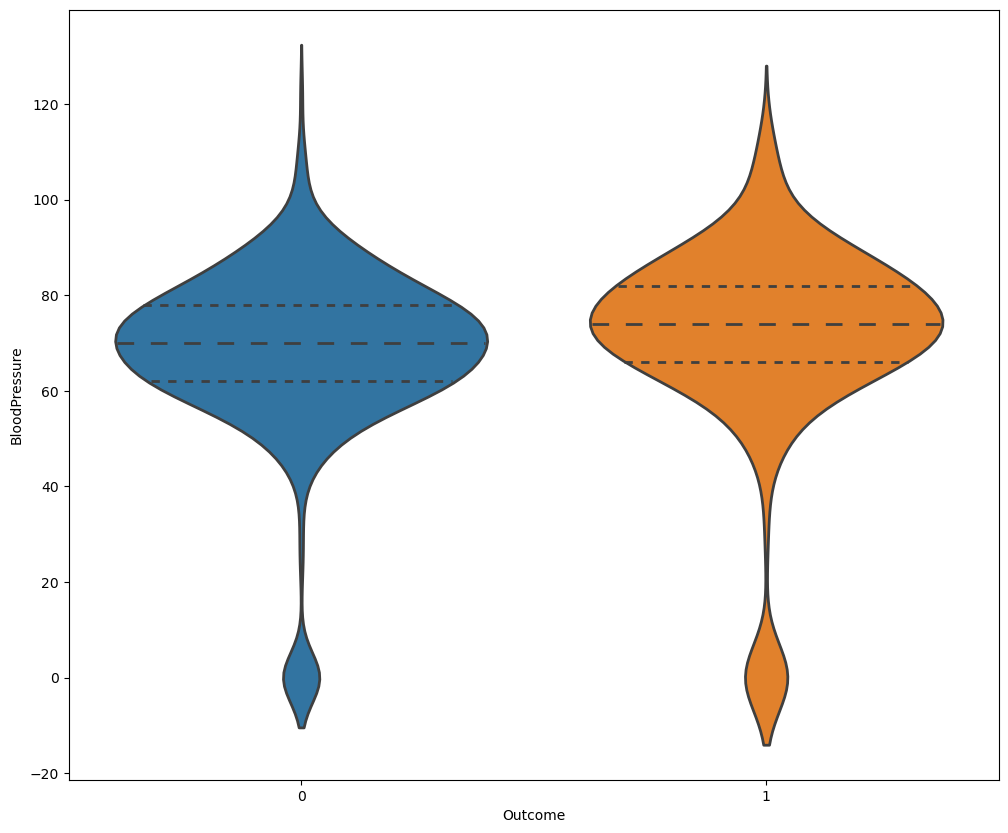

In [13]:
plt.figure(figsize = (12,10))
sns.violinplot(data = data, x = "Outcome", y = "BloodPressure", split = True, linewidth = 2, inner = "quart")

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

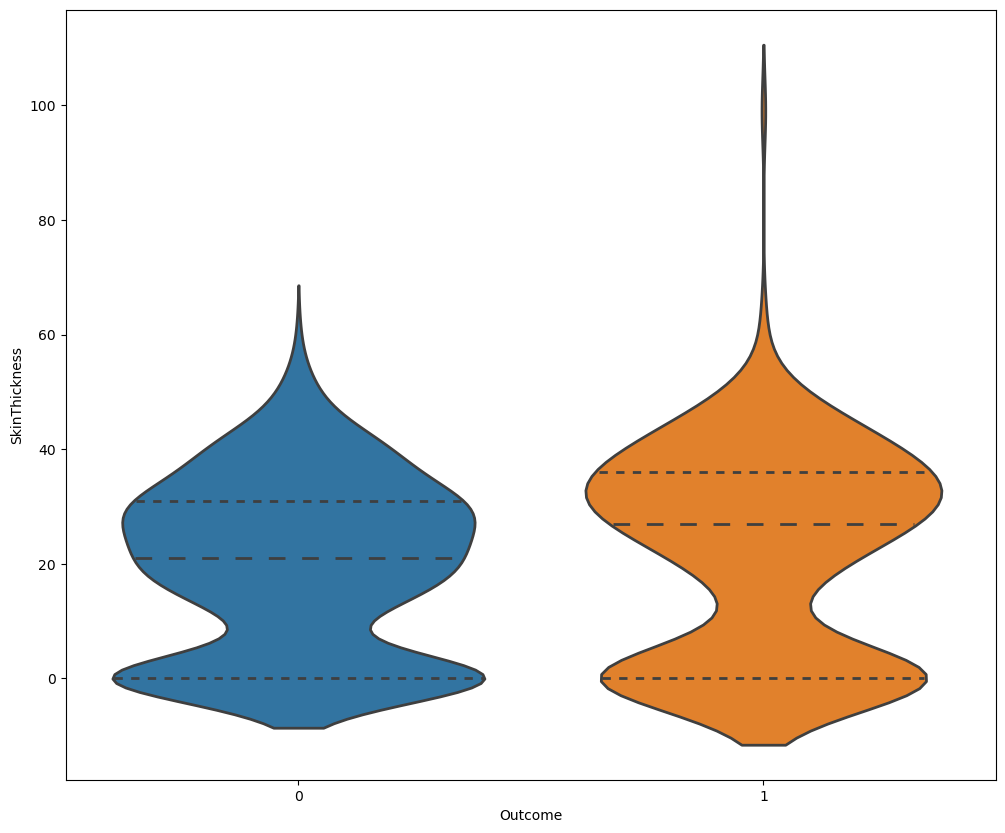

In [14]:
plt.figure(figsize = (12,10))
sns.violinplot(data = data, x = "Outcome", y = "SkinThickness", split = True, linewidth = 2, inner = "quart")

<Axes: xlabel='Outcome', ylabel='Insulin'>

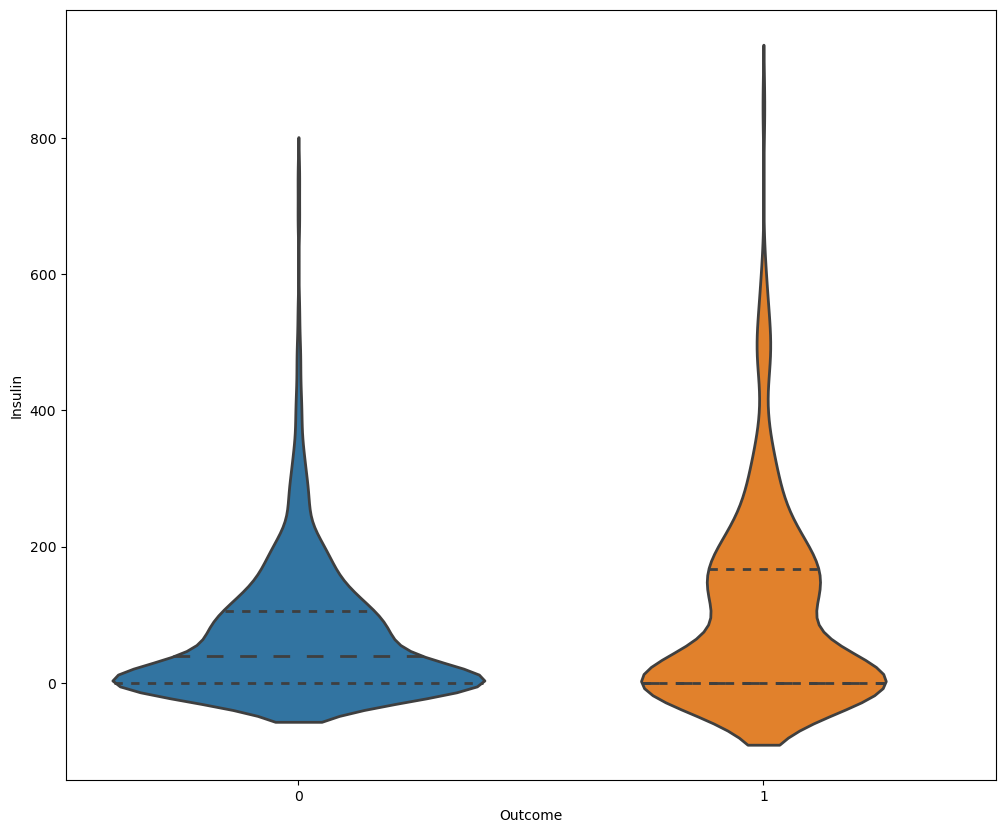

In [15]:
plt.figure(figsize = (12,10))
sns.violinplot(data = data, x = "Outcome", y = "Insulin", split = True, linewidth = 2, inner = "quart")

<Axes: xlabel='Outcome', ylabel='BMI'>

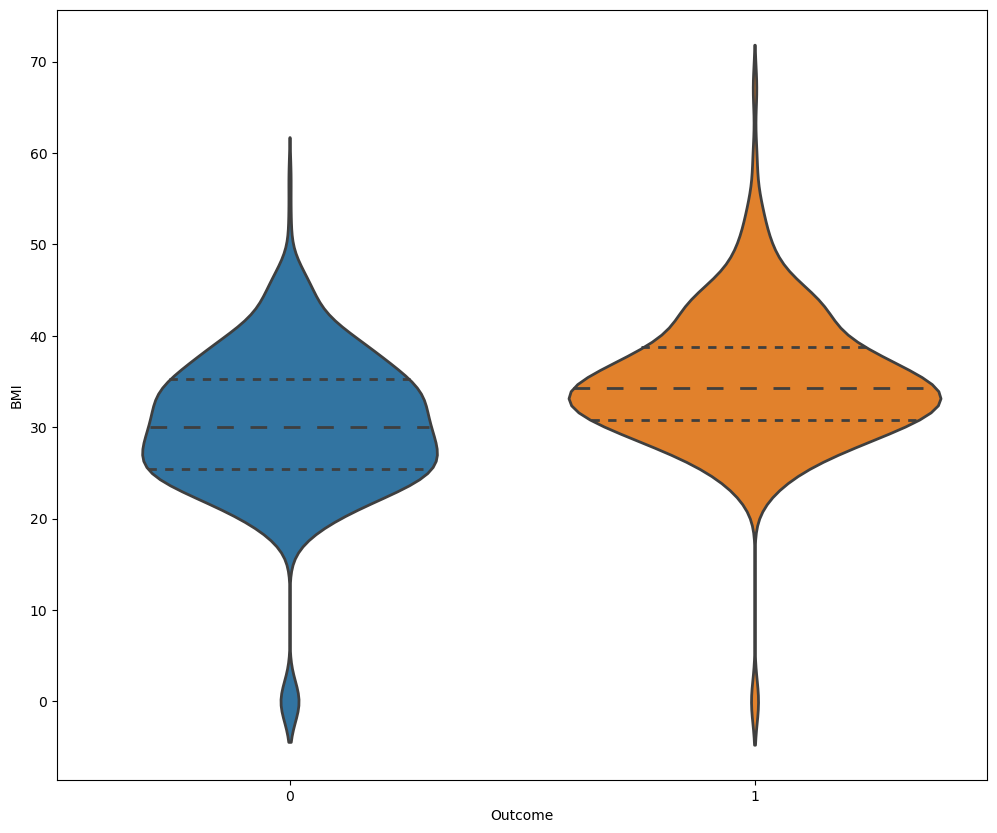

In [16]:
plt.figure(figsize = (12,10))
sns.violinplot(data = data, x = "Outcome", y = "BMI", split = True, linewidth = 2, inner = "quart")

In [47]:
# replacing 0's with mean/median values
data["Glucose"] = data["Glucose"].replace(0, data["Glucose"].median()) # Glucose
data["BloodPressure"] = data["BloodPressure"].replace(0, data["BloodPressure"].median()) # BloodPressure
data["BMI"] = data["BMI"].replace(0, data["BMI"].mean()) # BMI
data["SkinThickness"] = data["SkinThickness"].replace(0, data["SkinThickness"].median()) # SkinThickness
data["Insulin"] = data["Insulin"].replace(0, data["Insulin"].median()) # Insulin


In [48]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [49]:
# splitting dependent and independent data
x = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

In [50]:
# splitting data in training and testing dataset
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [52]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [53]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

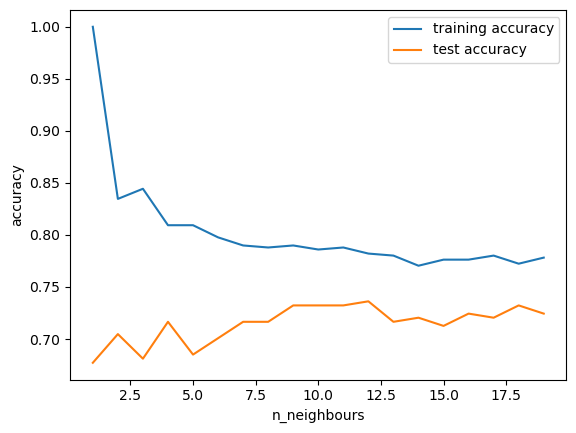

In [54]:
plt.plot(range(1,20), training_accuracy, label="training accuracy")
plt.plot(range(1,20), test_accuracy, label="test accuracy")
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.legend()

In [55]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(x_train, y_train)
print("training accuracy : ", knn.score(x_train, y_train))
print("test accuracy : ", knn.score(x_test, y_test))

training accuracy :  0.7723735408560312
test accuracy :  0.7322834645669292


In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [58]:
training_accuracy = []
test_accuracy = []
for max_depth in range(1,9):
    dt = DecisionTreeClassifier(random_state = 0, max_depth = max_depth)
    dt.fit(x_train, y_train)
    
    training_accuracy.append(dt.score(x_train, y_train))
    test_accuracy.append(dt.score(x_test, y_test))

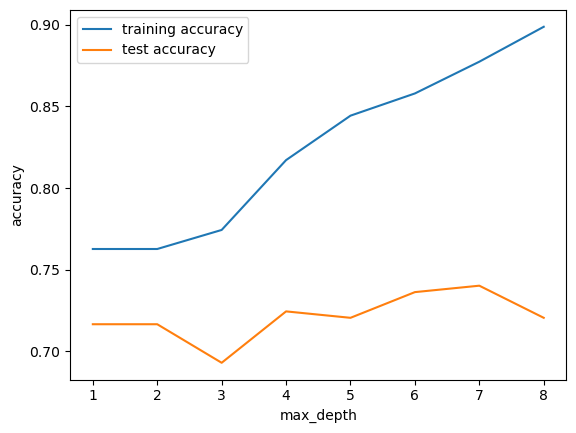

In [36]:
plt.plot(range(1,9), training_accuracy, label="training accuracy")
plt.plot(range(1,9), test_accuracy, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

In [59]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 4)
dt.fit(x_train, y_train)
print("training accuracy : ", dt.score(x_train, y_train))
print("test accuracy : ", dt.score(x_test, y_test))

training accuracy :  0.8171206225680934
test accuracy :  0.7244094488188977


In [74]:
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(x_train, y_train)
print("training accuracy : ", mlp.score(x_train, y_train))
print("test accuracy : ", mlp.score(x_test, y_test))

training accuracy :  0.7645914396887159
test accuracy :  0.7047244094488189


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [76]:
mlp1 = MLPClassifier(random_state = 42)
mlp1.fit(x_train_scaled, y_train)
print("training accuracy : ", mlp1.score(x_train_scaled, y_train))
print("test accuracy : ", mlp1.score(x_test_scaled, y_test))

training accuracy :  0.8326848249027238
test accuracy :  0.7362204724409449


/home/adi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [78]:
y_mlp1pred=mlp1.predict(x_test_scaled)

In [79]:
cm = confusion_matrix(y_test, y_mlp1pred)
cm

array([[136,  32],
       [ 35,  51]])

In [80]:
print(classification_report(y_test, y_mlp1pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.61      0.59      0.60        86

    accuracy                           0.74       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.74      0.74       254



<Axes: >

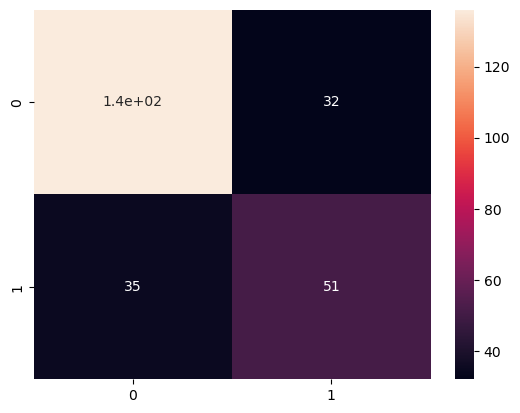

In [81]:
sns.heatmap(cm, annot = True)